# Dowdle's Titanic Survival Prediction
**Author:** Brittany Dowdle  
**Date:** March 26, 2025  
**Objective:** Use the data you inspected, explored, and cleaned previously. Use 3 models to predict survival on the Titanic from various input features. Compare model performance.


## Introduction
This project uses the Titanic dataset to predict survival based on features such as class, sex, and family size. We will train multiple models, evaluate performance using key metrics, and create visualizations to interpret the results. We use three common classification models in this lab: Decision Tree Classifier (DT), Support Vector Machine (SVM), and Neural Network (NN).
****

## Imports
In the code cell below, import the necessary Python libraries for this notebook. All imports should be at the top of the notebook. 

In [28]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
from pandas.plotting import scatter_matrix

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Import classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

****
## Section 1. Import and Inspect the Data

We don't need to inspect the data as we've already done that and are familiar with the data. 

In [29]:
# Load the data
titanic = sns.load_dataset('titanic')

****

## Section 2. Data Exploration and Preparation
We might need to clean it or do some feature engineering. Learning to figure out what you need is a key skill.

### 2.1 Handle Missing Values and Clean Data

- Impute missing values for age using the median.
- Fill in missing values for embark_town using the mode

In [30]:
# Impute missing values for age using the median 
titanic.fillna({'age': titanic['age'].median()}, inplace=True)

# Fill missing values for embark_town using the mode
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

### 2.2 Feature Engineering

- Add family_size - number of family members on board.
- Convert categorical "sex" to numeric.
- Convert categorical "embarked" to numeric.
- Binary feature - convert "alone" to numeric.

In [31]:
# Create family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Convert categorical to numeric
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Convert binary to numeric
titanic['alone'] = titanic['alone'].astype(int)

****

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target
Use three input cases like the example.

>First:
>
>input features: alone
>
>target: survived
>
>Second:
>
>input features - age
>
>target: survived
>
>Third:
>
>input features -  age and family_size
>
>target: survived

### 3.2 Define X and y

- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Use comments to run a single case at a time

In [32]:
# Pro tip: Double brackets [[ ]]] makes a 2D DataFrame. Single brackets [ ] make a 1D Series.
# Case 1: alone only 
X = titanic[['alone']]
y = titanic['survived']

# Case 2: age only
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size
# X = titanic[['age', 'family_size']]
# y = titanic['survived']

# Print the first few rows to confirm feature selection
print("Selected Features:")
print(X.head())

print("\nTarget Variable:")
print(y.head())

Selected Features:
   alone
0      0
1      0
2      1
3      0
4      1

Target Variable:
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


### Reflection 3:

1) Why are these features selected? **Alone: Determines who a passenger was traveling with, which could impact their ability to receive help or access lifeboats. Age: Younger passengers, especially children, were prioritized for lifeboats, while older passengers may have faced mobility challenges. Family Size: Traveling with family could improve survival chances due to mutual assistance, but larger families might have struggled to evacuate together.**
2) Are there any features that are likely to be highly predictive of survival? **Yes. Sex: Women had much higher survival rates, Pclass: First-class passengers had better access to lifeboats, Fare: Higher fares correlated with better survival chances, Embarked: Port of embarkation might reflect social/economic factors.**

****

## Section 4. Train a Classification Model (Decision Tree)


### 4.1 Split the Data
Split the data into training and test sets. Use StratifiedShuffleSplit to ensure even class distribution.

In [33]:
# Define how many splits, % of data for testing, and ensure reproducibility
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

# Split data into a training set and a test set
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

# Show set sizes
print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


### 4.2 Create and Train Model (Decision Tree)
Create and train a decision tree model with no random initializer argument.

In [34]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Show depth for confirmation
print(f"Tree Depth: {tree_model.get_depth()}")

Tree Depth: 1


### 4.3 Predict and Evaluate Model Performance

- Evaluate model performance on training data.
- Evaluate model performance on test data.

In [35]:
# Training data (X_train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [36]:
# Test data (X_test)
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



### 4.4 Report Confusion Matrix (as a heatmap)
Plot a confusion matrix.

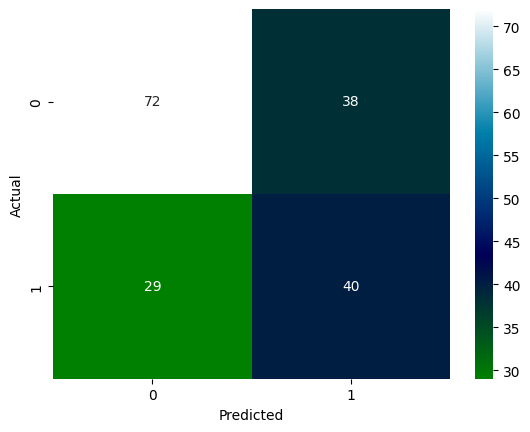

In [37]:
# Create matrix
cm = confusion_matrix(y_test, y_test_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap='ocean')

# Labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Show the plot
plt.tight_layout
plt.show()  

### 4.5 Report Decision Tree Plot
Plot the decision tree model. Give the plotter the names of the features and the names of the categories for the target. Save the image to use it in other places.

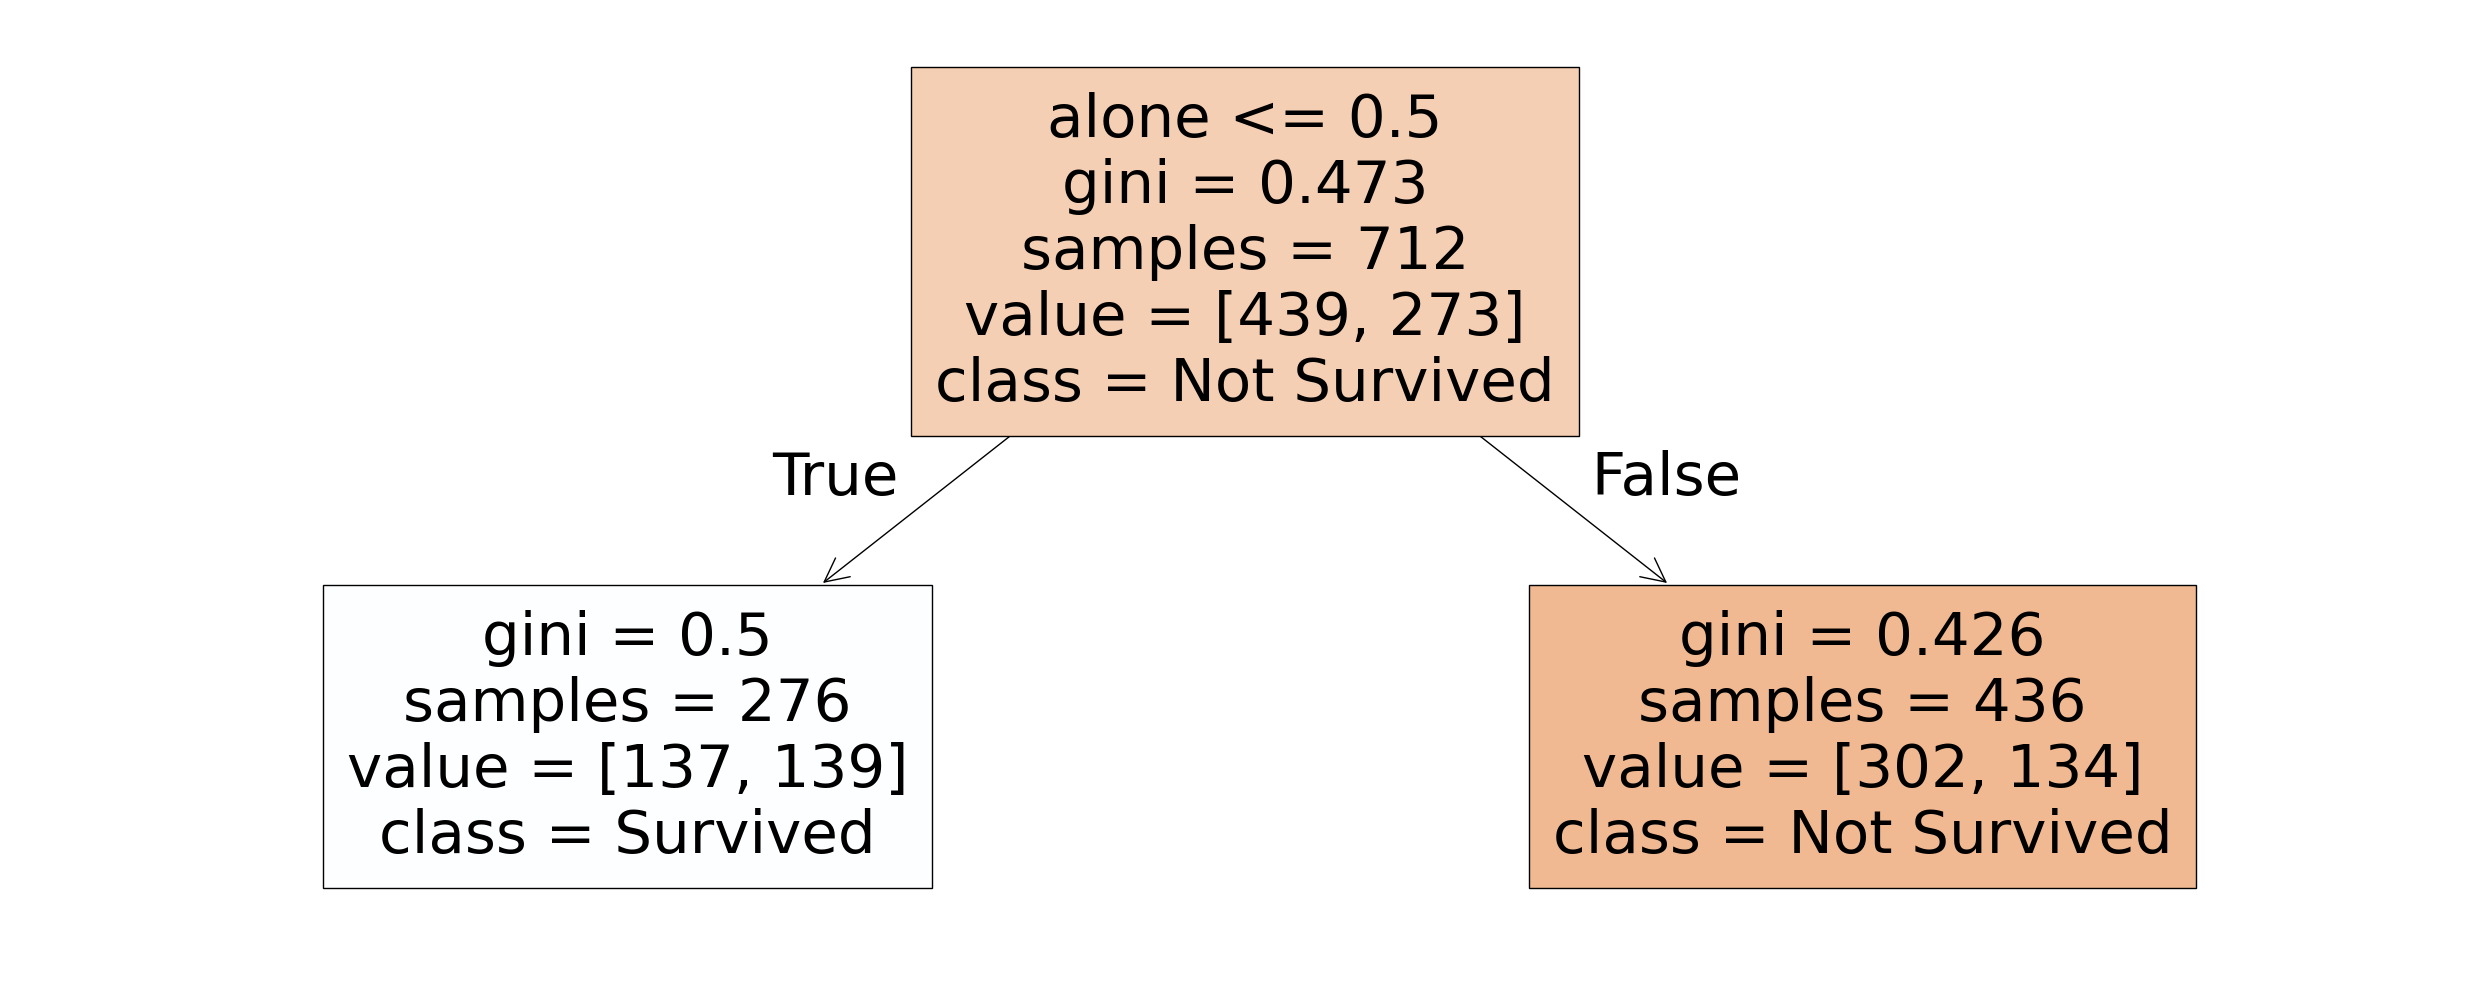

In [38]:
# Create the tree
fig, ax = plt.subplots(figsize=(25, 10))  # Define figure and axis
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, ax=ax)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the tree
plt.show()

# Save the image
fig.savefig("decision_tree_titanic.png", bbox_inches="tight")  # Save without cutting off parts